In [2]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

### Adam Candrák/Mária Matušisková - 50%/50%

# Imports

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

# Phase 1 - Exploratory analysis

## 1.1 Basic description of the data together with characteristics
### EDA with visualization
-------------------------------------------------------------------------------------------
#### Analysis of data structures such as files (structures and relations, number, types, ...), records (structures, number of records, number of attributes, types, ...)


#### *1. Load dataset Connections*

In [4]:
connections_file = "../data/Connections.csv"
devices_file = "../data/Devices.csv"
processes_file = "../data/Processes.csv"
profiles_file = "../data/Profiles.csv"

connections = pd.read_csv(connections_file, sep='\t')
devices = pd.read_csv(devices_file, sep='\t')
processes = pd.read_csv(processes_file, sep='\t')
profiles = pd.read_csv(profiles_file, sep='\t')

#### *2. Explore data*
- **Connections** - Data represents a collection of logs from the mobile device connection. There are 13 columns:
    - ts - timestamp
    - imei - International Mobile Equipment Identity - It is a unique number that helps identify device or track it when it is lost. Furthermore, it is preventing from unauthorized network access.
    - mwra - indicates malware-related-activity in one time interval
    - c.katana - usage of the Facebook app
    - c.android.chrome - usage of the Chrome app
    - c.android.gm - usage of the Gmail app
    - c.dogalize - usage of the Dogalize app
    - c.android.youtube - usage of the YouTube app
    - c.updateassist - might be a system app which updates something on the device
    - c.UCMobile.intl - usage of UC Browser, which can be built in the mobile device
    - c.raider - usage of Raider app - it is a game probably
    - c.android.vending - refers to Google Play Store
    - c.UCMobile.x86 - usage of UC Browser, which can be built in the mobile device but with x86 architecture

In [4]:
connections.columns

Index(['ts', 'imei', 'mwra', 'c.katana', 'c.android.chrome', 'c.android.gm',
       'c.dogalize', 'c.android.youtube', 'c.updateassist', 'c.UCMobile.intl',
       'c.raider', 'c.android.vending', 'c.UCMobile.x86'],
      dtype='object')

The types of columns:

In [5]:
connections.dtypes

ts                    object
imei                   int64
mwra                 float64
c.katana             float64
c.android.chrome     float64
c.android.gm         float64
c.dogalize           float64
c.android.youtube    float64
c.updateassist       float64
c.UCMobile.intl      float64
c.raider             float64
c.android.vending    float64
c.UCMobile.x86       float64
dtype: object

The dataset connections has 196 196 records.

In [6]:
connections.size

196196

See first rows of the dataset:

In [7]:
connections.head()

,ts,imei,mwra,c.katana,c.android.chrome,c.android.gm,c.dogalize,c.android.youtube,c.updateassist,c.UCMobile.intl,c.raider,c.android.vending,c.UCMobile.x86
0,2018-05-05 10:00:00,3590433799317662188,1.0,10.99774,11.05477,6.03999,12.49767,8.59956,14.00953,52.54470,43.93493,66.86890,46.35705
1,2018-05-05 10:01:00,3590433799317662394,1.0,11.08234,9.64636,8.64167,12.60788,9.84197,38.27736,44.56009,47.40309,9.56533,33.53140
2,2018-05-05 10:02:00,3590433799317661834,0.0,11.49582,12.27416,11.59681,12.99258,9.74923,57.41411,36.83333,58.51427,45.83339,20.26636
3,2018-05-05 10:03:00,8630330696303481289,0.0,10.50935,11.41774,14.43350,12.91018,13.93857,31.57549,41.34296,60.12589,81.04877,80.43563
4,2018-05-05 10:04:00,8630330696303481149,0.0,10.25989,14.46448,14.02728,8.58832,13.04853,49.47100,38.86755,57.83154,28.15473,43.36029


See more info about the dataset... There is a rule that the columns should not have a null value.

In [8]:
connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15092 non-null  object 
 1   imei               15092 non-null  int64  
 2   mwra               15092 non-null  float64
 3   c.katana           15092 non-null  float64
 4   c.android.chrome   15092 non-null  float64
 5   c.android.gm       15092 non-null  float64
 6   c.dogalize         15092 non-null  float64
 7   c.android.youtube  15092 non-null  float64
 8   c.updateassist     15092 non-null  float64
 9   c.UCMobile.intl    15092 non-null  float64
 10  c.raider           15092 non-null  float64
 11  c.android.vending  15092 non-null  float64
 12  c.UCMobile.x86     15092 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


Let's see descriptive statistics for a data distribution:
- count - the final number of the non-null values
- mean - the average of the values in the each column
- std - the standard deviation (how spread out the data are)
- min - the smallest value in the each column
- 25% - the value closest to the 25% metric of data
- 50% - the value closest to the 50% metric of data
- 75% - the value closest to the 75% metric of data
- max - the highest value in the each column

In [9]:
connections.describe()

,imei,mwra,c.katana,c.android.chrome,c.android.gm,c.dogalize,c.android.youtube,c.updateassist,c.UCMobile.intl,c.raider,c.android.vending,c.UCMobile.x86
count,1.509200e+04,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000,15092.000000
mean,3.917358e+18,0.626093,10.967173,11.601913,12.255218,10.451356,12.241718,45.995032,45.847281,49.189666,49.636194,49.758584
std,3.343123e+18,0.483855,2.672212,2.576451,2.563193,2.292431,2.561090,12.501465,13.067914,13.357856,28.917318,28.693358
min,3.590434e+17,0.000000,1.639510,2.985830,1.596520,2.971390,3.167750,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,9.079035,9.686500,10.666015,8.896942,10.424260,37.485313,37.116653,40.244102,24.365138,25.365020
50%,3.590434e+18,1.000000,10.863685,11.462210,12.563215,10.245800,12.346030,46.017320,45.841985,49.110105,49.546135,49.822055
75%,8.630331e+18,1.000000,12.814152,13.487845,14.059870,11.790168,14.103033,54.409880,54.669180,58.244978,74.764725,74.106212
max,8.630331e+18,1.000000,21.046730,20.927980,20.238460,20.303620,21.411230,100.000000,100.000000,100.000000,100.000000,100.000000


In [10]:
connections.describe(exclude=np.number)

,ts
count,15092
unique,14913
top,2018-05-14 03:05:00
freq,2


Number of rows and columns:

In [11]:
connections.shape

(15092, 13)

#### *3. Analyze Data Structure*

- **Connections**

Count elements (distinct)

In [12]:
connections.nunique()

ts                   14913
imei                   500
mwra                     2
c.katana             14797
c.android.chrome     14776
c.android.gm         14792
c.dogalize           14755
c.android.youtube    14784
c.updateassist       14886
c.UCMobile.intl      14888
c.raider             14878
c.android.vending    14901
c.UCMobile.x86       14905
dtype: int64

-----------------------------------------------------
#### Analysis of individual attributes: for selected significant attributes (min 10), analyze their distributions and basic descriptive statistics.

- **Connections**

Let's measure mean, median, mode:

In [13]:
connections['mwra'].mean()

np.float64(0.6260932944606414)

In [14]:
connections['mwra'].median()

np.float64(1.0)

In [15]:
stats.mode(connections['mwra'])

ModeResult(mode=np.float64(1.0), count=np.int64(9449))

Summarize the distribution of various usages of apps, while excluding imei and ts, because those are not numerical values.

Text(0.5, 1.0, 'Box Plot of Connections Data')

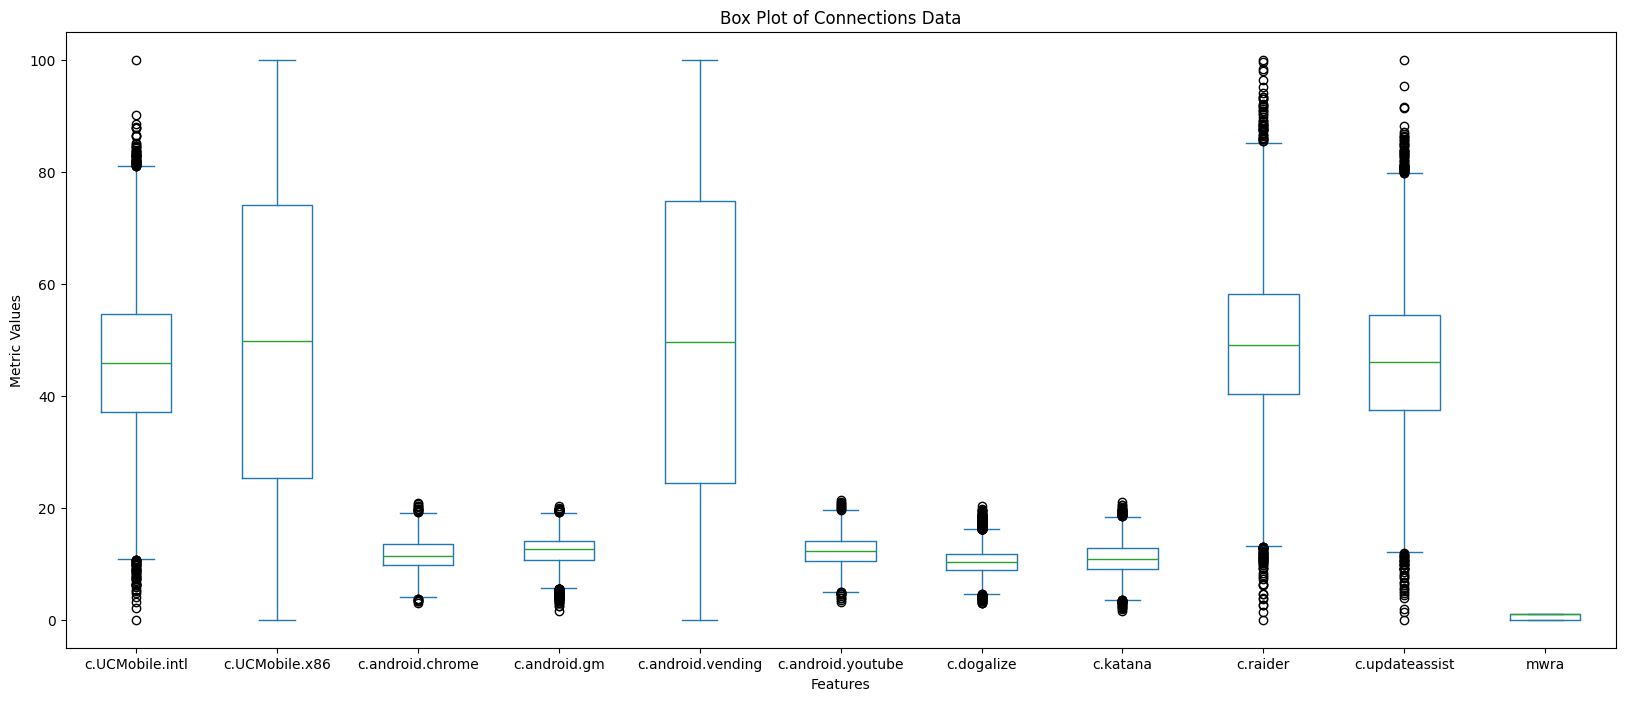

In [16]:
fig, ax = plt.subplots(figsize=(20, 8))

connections[connections.columns.difference(['imei', 'ts'])].plot.box(ax=ax)

plt.xlabel('Features')
plt.ylabel('Metric Values')
plt.title('Box Plot of Connections Data')

Occurrence of values from the column c.katana:

<Axes: ylabel='Frequency'>

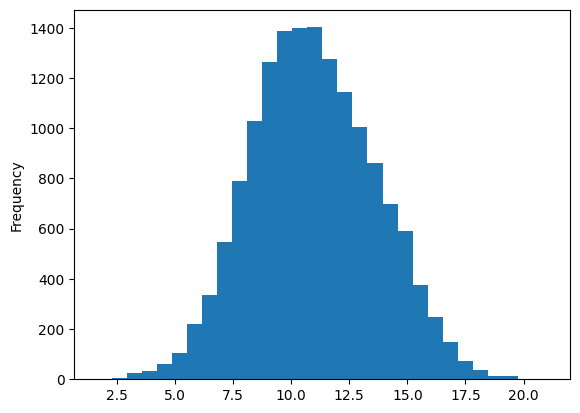

In [16]:
connections['c.katana'].plot.hist(bins=30)

Occurrence of values from the column c.android.chrome:

<Axes: ylabel='Frequency'>

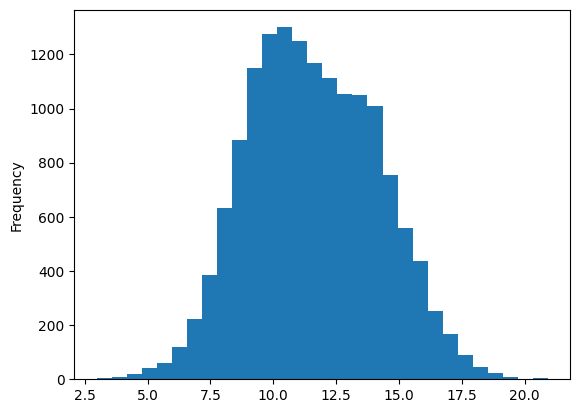

In [17]:
connections['c.android.chrome'].plot.hist(bins=30)

Occurrence of values from the column c.android.gm:

<Axes: ylabel='Frequency'>

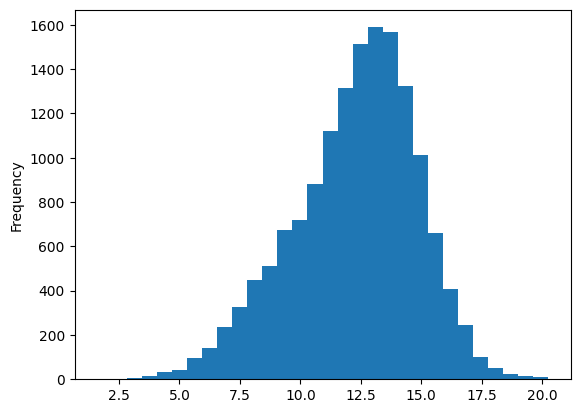

In [18]:
connections['c.android.gm'].plot.hist(bins=30)

Occurrence of values from the column c.dogalize:

<Axes: ylabel='Frequency'>

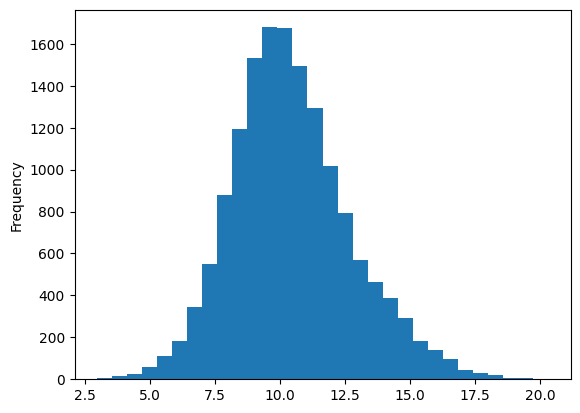

In [29]:
connections['c.dogalize'].plot.hist(bins=30)

Occurrence of values from the column c.android.youtube:

<Axes: ylabel='Frequency'>

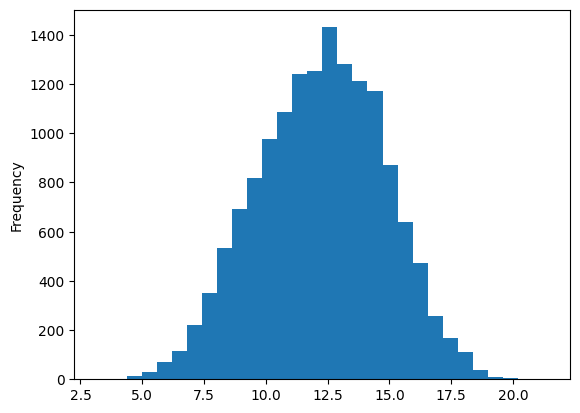

In [30]:
connections['c.android.youtube'].plot.hist(bins=30)

Occurrence of values from the column c.updateassist:

<Axes: ylabel='Frequency'>

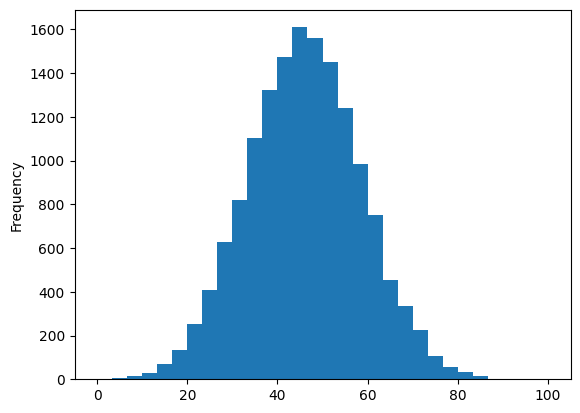

In [31]:
connections['c.updateassist'].plot.hist(bins=30)

Occurrence of values from the column c.UCMobile.intl:

<Axes: ylabel='Frequency'>

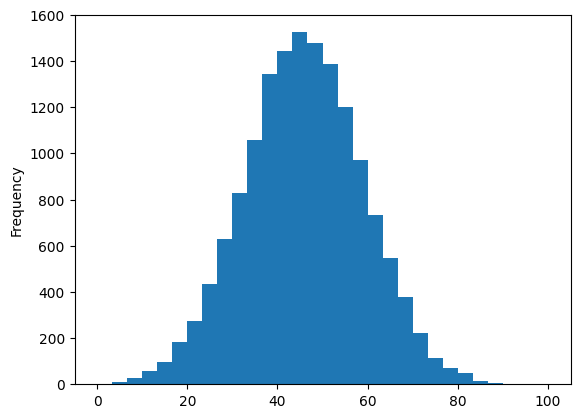

In [32]:
connections['c.UCMobile.intl'].plot.hist(bins=30)

Occurrence of values from the column c.raider:

<Axes: ylabel='Frequency'>

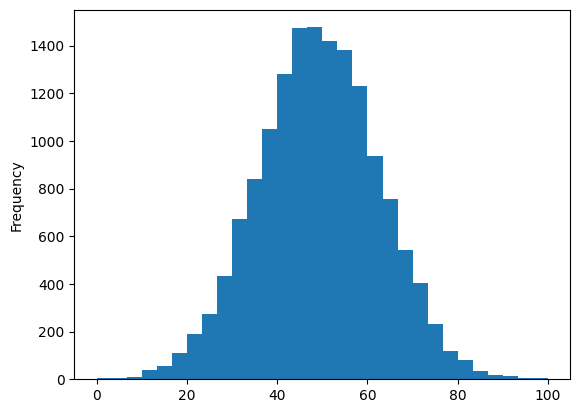

In [33]:
connections['c.raider'].plot.hist(bins=30)

Occurrence of values from the column c.android.vending:

<Axes: ylabel='Frequency'>

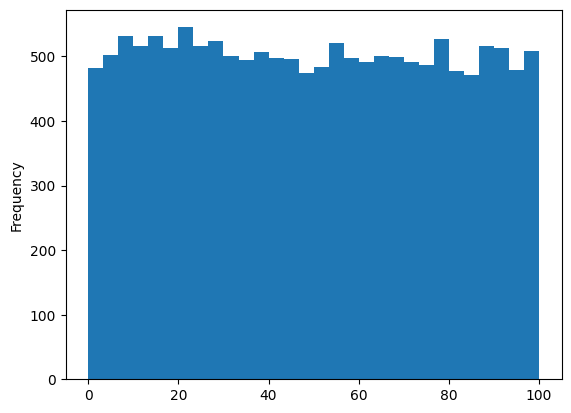

In [34]:
connections['c.android.vending'].plot.hist(bins=30)

Occurrence of values from the column c.UCMobile.x86:

<Axes: ylabel='Frequency'>

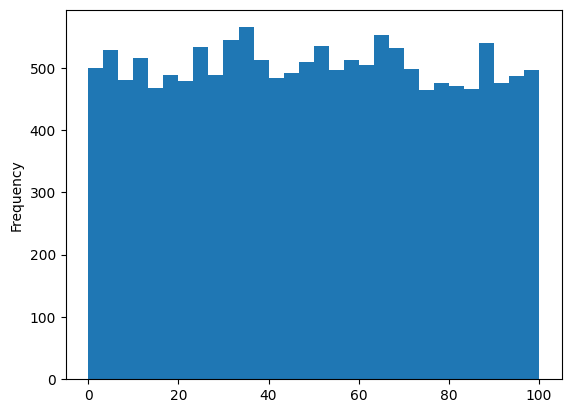

In [35]:
connections['c.UCMobile.x86'].plot.hist(bins=30)

*Data distribution:*

Show distribution plot for the c.katana column:

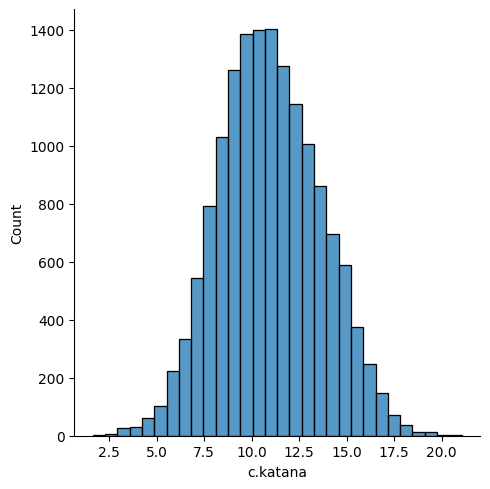

In [37]:
sns.displot(connections['c.katana'], bins=30)

Show distribution plot for the c.android.chrome column:

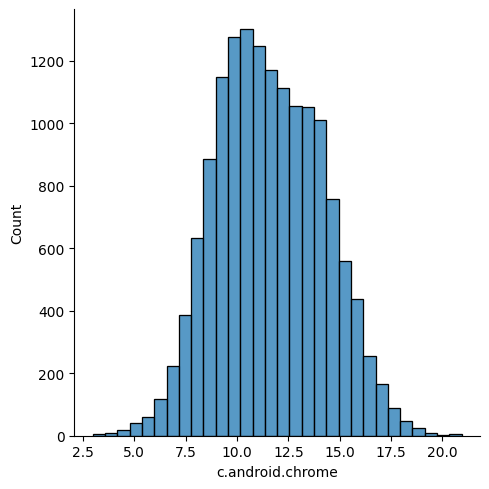

In [38]:
sns.displot(connections['c.android.chrome'], bins=30)

Show distribution plot for the mwra column:

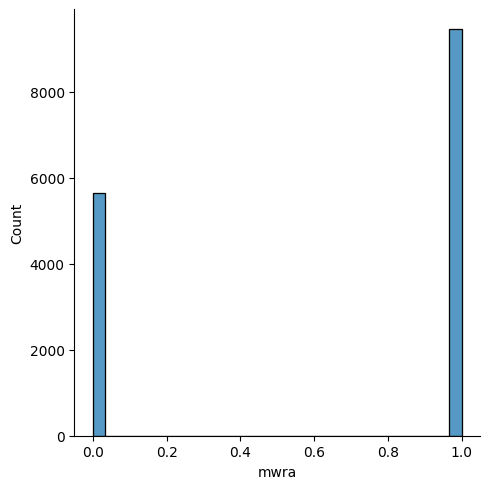

In [40]:
sns.displot(connections['mwra'], bins=30)

Create a boxplot for column c.dogalize:

<Axes: ylabel='c.dogalize'>

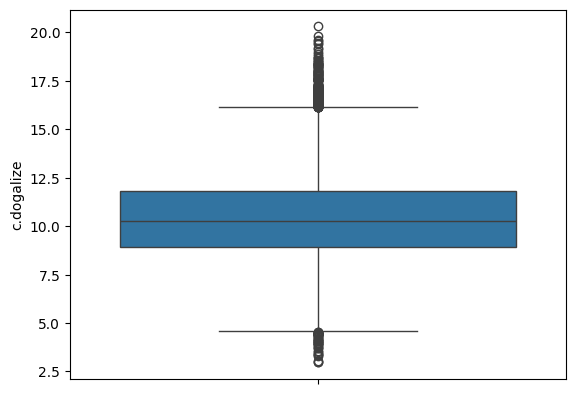

In [42]:
sns.boxplot(connections['c.dogalize'])

Create a histogram for column c.raider:

<Axes: xlabel='c.raider', ylabel='Count'>

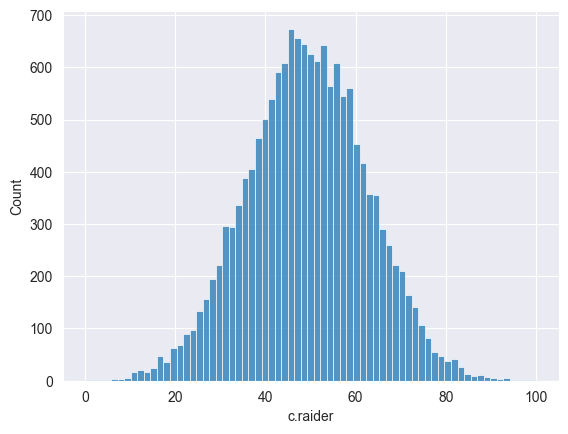

In [5]:
sns.histplot(connections['c.raider'])

---------------------------------------------------
#### Pairwise data analysis: Identify relationships and dependencies between pairs of attributes.


Bivariate analysis = Pair analysis.
To see correlation between two variables/attributes

<Axes: xlabel='c.katana', ylabel='c.android.gm'>

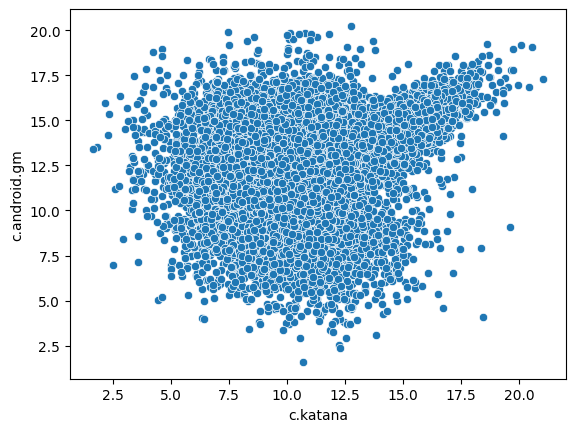

In [20]:
sns.scatterplot(data=connections, x='c.katana', y='c.android.gm')

<Axes: xlabel='c.UCMobile.intl', ylabel='c.android.chrome'>

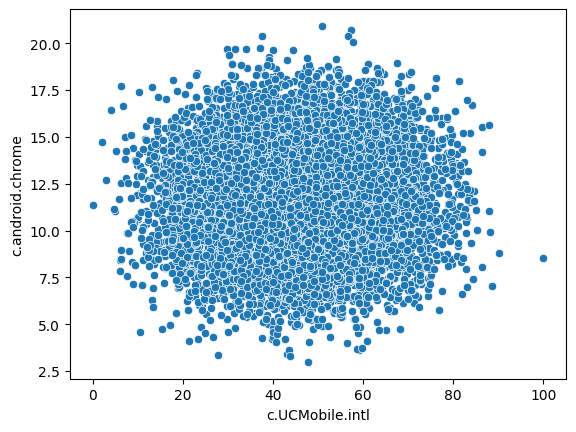

In [24]:
sns.scatterplot(data=connections, x='c.UCMobile.intl', y='c.android.chrome')

<Axes: xlabel='c.android.youtube', ylabel='c.raider'>

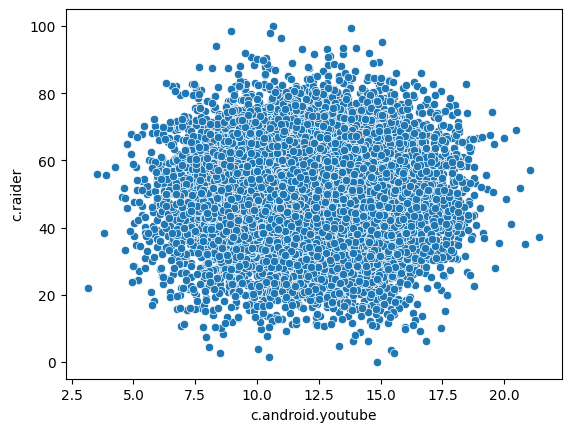

In [18]:
sns.scatterplot(data=connections, x='c.android.youtube', y='c.raider')

Compare the distribution between columns c.dogalize and c.updateassist:

<Axes: xlabel='c.dogalize', ylabel='c.updateassist'>

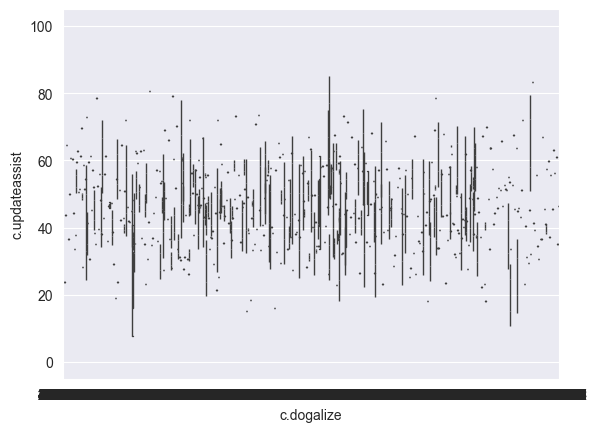

In [6]:
sns.boxplot(x='c.dogalize', y='c.updateassist', data=connections)

Correlation - how strong linear relationship is of the two values

Pearson correlation: 0.440


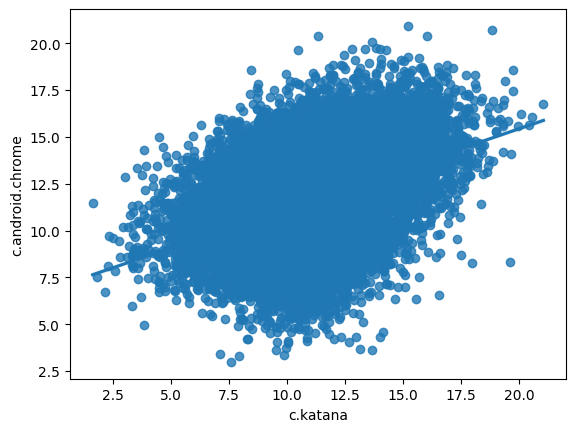

In [20]:
sns.regplot(x="c.katana", y="c.android.chrome", data=connections)
print("Pearson correlation: %.3f" % connections['c.katana'].corr(connections['c.android.chrome']))

Correlation it the table, summary:

In [21]:
connections.corr(numeric_only=True)

,imei,mwra,c.katana,c.android.chrome,c.android.gm,c.dogalize,c.android.youtube,c.updateassist,c.UCMobile.intl,c.raider,c.android.vending,c.UCMobile.x86
imei,1.000000,-0.000506,0.002984,0.009973,0.012178,-0.014031,0.009609,-0.006181,0.001607,-0.008165,-0.002698,0.008191
mwra,-0.000506,1.000000,0.253975,-0.000698,-0.285003,-0.314610,-0.282955,-0.004872,0.001310,-0.008114,-0.010500,-0.007505
c.katana,0.002984,0.253975,1.000000,0.440491,0.261719,-0.056870,0.214295,-0.005600,0.017238,-0.009569,0.004281,0.002217
c.android.chrome,0.009973,-0.000698,0.440491,1.000000,0.302061,-0.299317,0.336279,-0.002080,0.019652,0.002862,-0.006816,0.005651
c.android.gm,0.012178,-0.285003,0.261719,0.302061,1.000000,-0.054984,0.514237,-0.003355,0.018509,0.004925,-0.007051,0.004187
c.dogalize,-0.014031,-0.314610,-0.056870,-0.299317,-0.054984,1.000000,0.176557,0.002249,-0.016619,0.008874,0.006125,-0.007353
c.android.youtube,0.009609,-0.282955,0.214295,0.336279,0.514237,0.176557,1.000000,0.004275,0.000672,-0.004285,-0.007668,0.002179
c.updateassist,-0.006181,-0.004872,-0.005600,-0.002080,-0.003355,0.002249,0.004275,1.000000,-0.006131,-0.010725,-0.000556,-0.011638
c.UCMobile.intl,0.001607,0.001310,0.017238,0.019652,0.018509,-0.016619,0.000672,-0.006131,1.000000,0.020255,-0.003844,-0.010971
c.raider,-0.008165,-0.008114,-0.009569,0.002862,0.004925,0.008874,-0.004285,-0.010725,0.020255,1.000000,-0.009166,0.001396


Show correlations through heatmap to visualize numerical values between columns:

<Axes: >

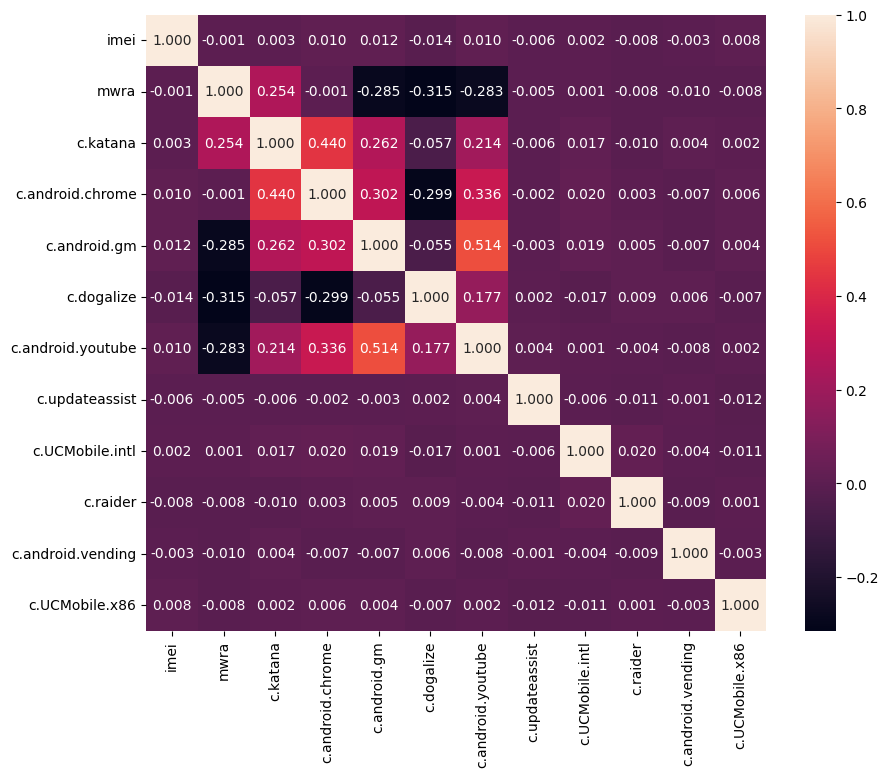

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(connections.corr(numeric_only=True), ax=ax, annot=True, fmt=".3f")

--------------------------------------------------------------------
#### Paired data analysis: Identify dependencies between the predicted variable and other variables (potential predictors).

Let's see through the *regplot* if there is some relationship between mwra and c.katana. From the *heatmap*, it is obvious that only c.katana has positive value to mwra.

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(connections.corr(numeric_only=True), ax=ax, annot=True, fmt=".3f")

Pearson correlation: 0.254


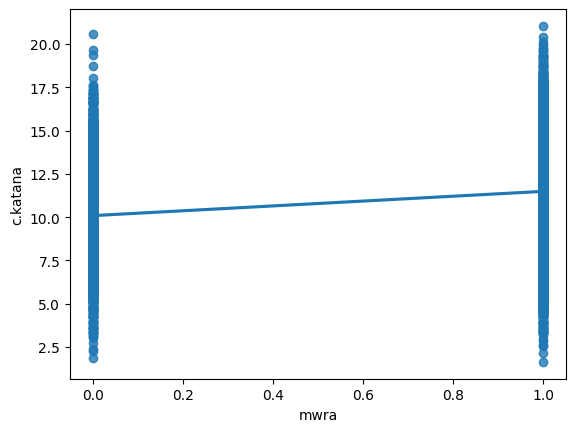

In [39]:
sns.regplot(x="mwra", y="c.katana", data=connections)
print("Pearson correlation: %.3f" % connections['mwra'].corr(connections['c.katana']))

In [ ]:
%%sql


Show boxplot to compare c.katana with mwra. The median is higher where mwra is 1.0

<Axes: xlabel='mwra', ylabel='c.katana'>

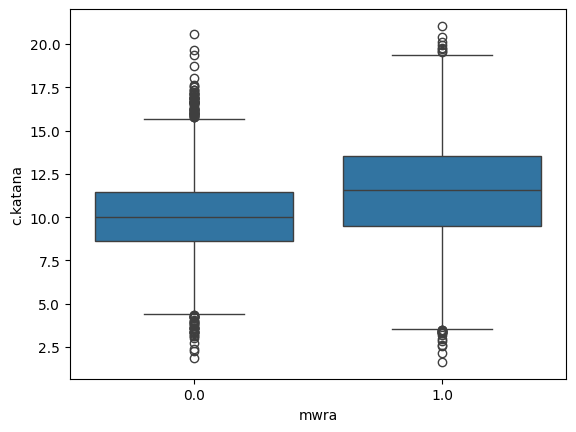

In [40]:
sns.boxplot(x='mwra', y='c.katana', data=connections)